# Single Variable Training

# Training With Old Dataset & Computed Input Feature

# ** Note! : This Old Dataset Have Over 100% Event

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv('../LSTM_Ready_Dataset_Old.csv')
df

,timestamp,node_cpu_usage_10.35.29.108:10250,node_cpu_usage_10.35.29.109:10250,node_cpu_usage_10.35.29.110:10250,node_mem_usage_10.35.29.108:10250,node_mem_usage_10.35.29.109:10250,node_mem_usage_10.35.29.110:10250,node_cpu_req_unknown,node_cpu_req_aj-aung-k8s-master,node_cpu_req_aj-aung-k8s-worker1,...,node_mem_req_aj-aung-k8s-master,node_mem_req_aj-aung-k8s-worker1,node_mem_req_aj-aung-k8s-worker2,node_cpu_cap_aj-aung-k8s-master,node_cpu_cap_aj-aung-k8s-worker1,node_cpu_cap_aj-aung-k8s-worker2,node_mem_cap_aj-aung-k8s-master,node_mem_cap_aj-aung-k8s-worker1,node_mem_cap_aj-aung-k8s-worker2,cluster_pods_pending
0,2024-01-01 00:00:00,0.208623,5.975408,0.000000,1922273280,2561769472,0.0,0.2,1.2,3.95,...,461373440.0,2.638217e+09,0.000000e+00,4.0,4.0,0.0,8.332218e+09,8.332227e+09,0.000000e+00,2.0
1,2024-01-01 00:01:00,0.326459,5.980638,0.000000,1930141696,2591625216,0.0,0.8,1.2,3.95,...,461373440.0,2.638217e+09,0.000000e+00,4.0,4.0,0.0,8.332218e+09,8.332227e+09,0.000000e+00,5.0
2,2024-01-01 00:02:00,0.219911,5.765409,1.515837,1926356992,2586947584,374190080.0,0.0,1.2,3.95,...,461373440.0,2.638217e+09,1.149239e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.289938e+09,0.0
3,2024-01-01 00:03:00,0.221737,5.879989,2.850323,1940553728,2593882112,388370432.0,0.0,1.2,3.95,...,461373440.0,2.638217e+09,1.417675e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.289938e+09,0.0
4,2024-01-01 00:04:00,0.234354,5.842184,4.132435,1887465472,2598359040,400961536.0,0.0,1.2,3.95,...,461373440.0,2.638217e+09,1.820328e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.289938e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,2024-01-14 12:37:00,0.215379,5.160844,5.077805,1995857920,2587627520,409989120.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0
19478,2024-01-14 12:38:00,0.200130,5.118348,5.014877,1952833536,2601111552,412585984.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0
19479,2024-01-14 12:39:00,0.209720,5.174387,5.084887,1955295232,2584264704,415567872.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0
19480,2024-01-14 12:40:00,0.202781,5.333707,5.059837,1951297536,2554994688,416882688.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0


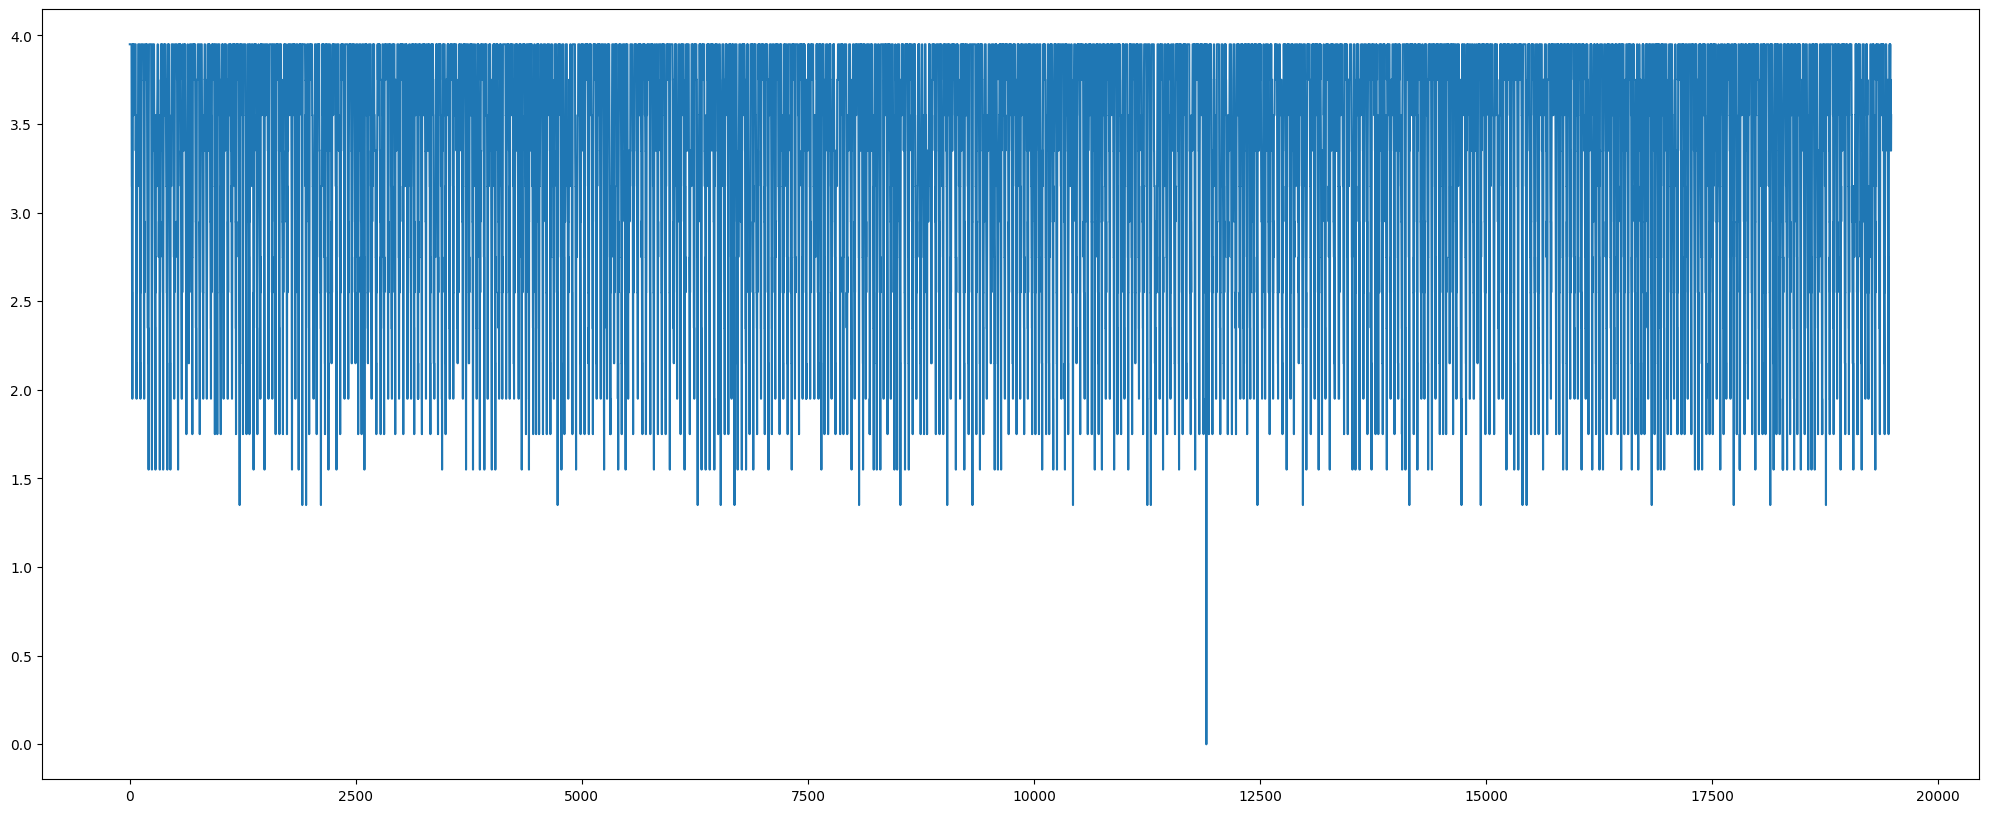

In [4]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_req_aj-aung-k8s-worker1'])
plt.show()

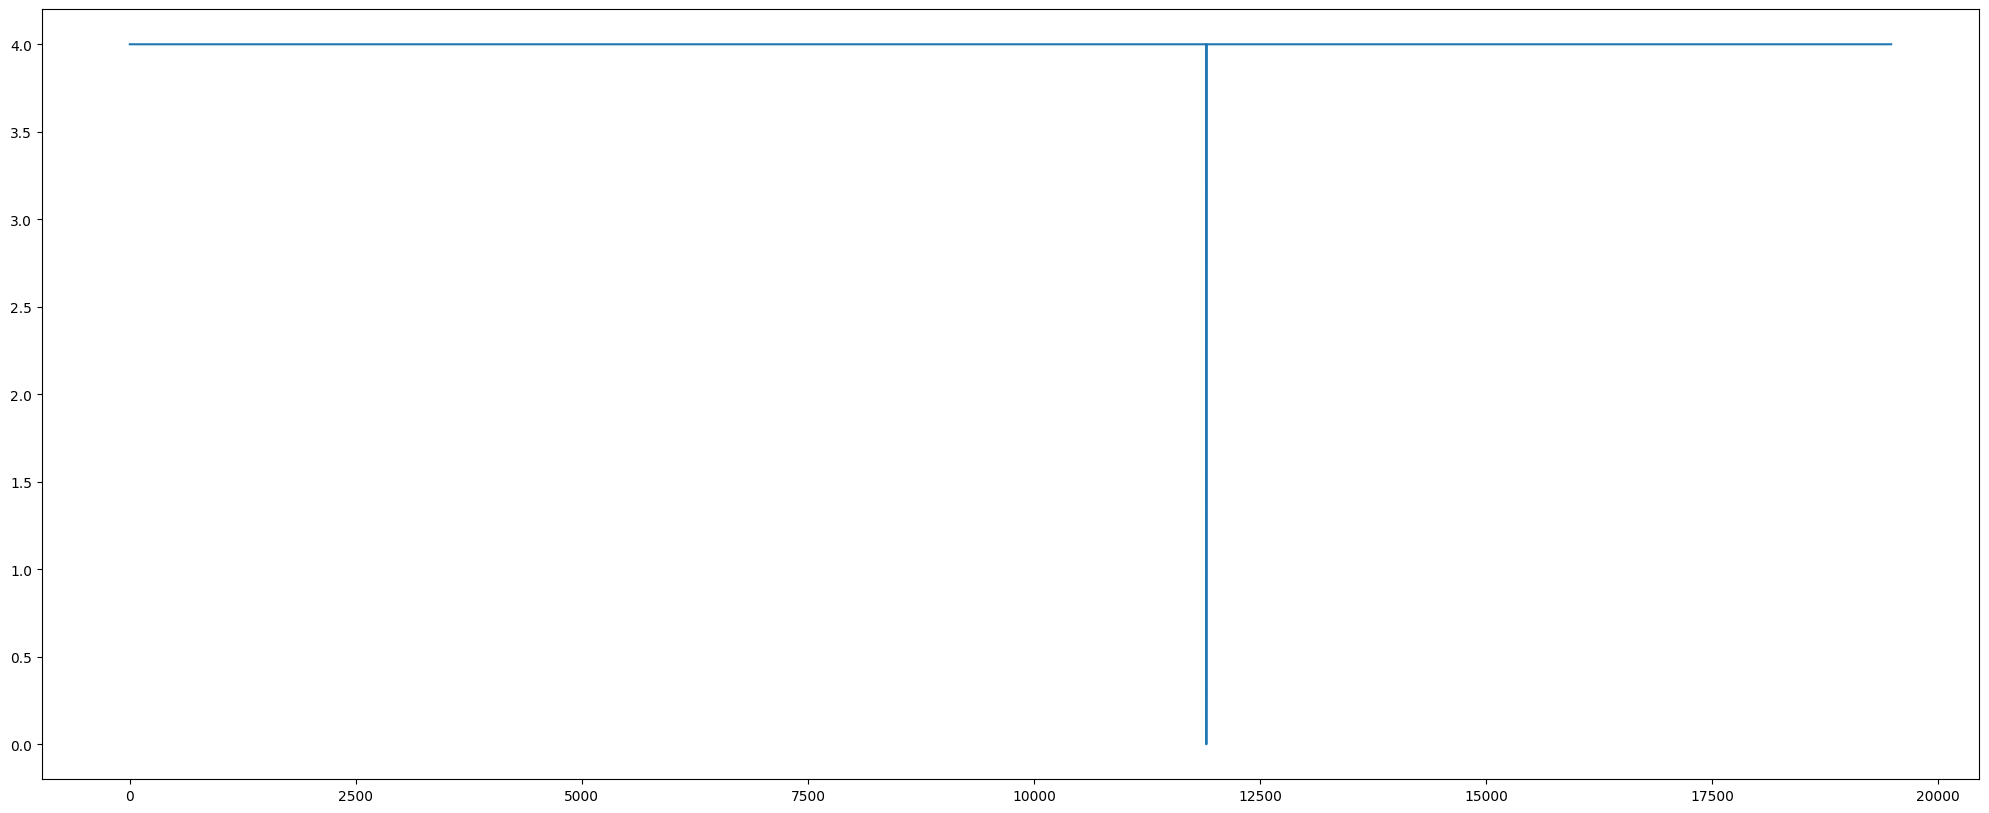

In [5]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_cap_aj-aung-k8s-worker1'])
plt.show()

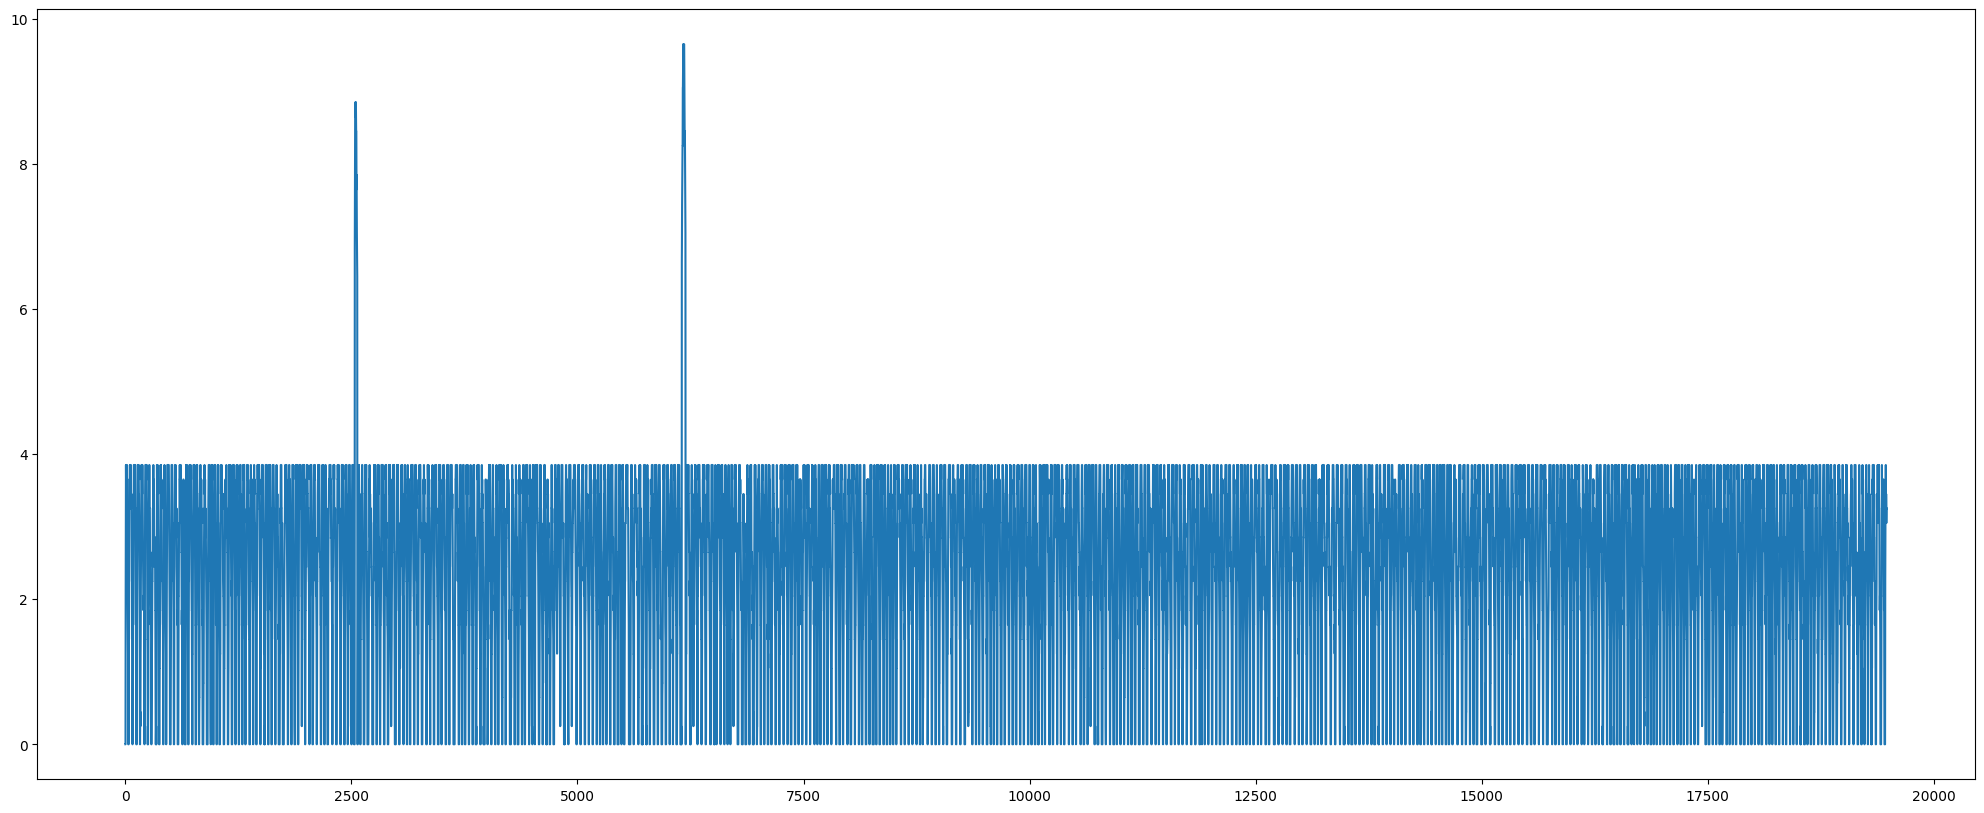

In [6]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_req_aj-aung-k8s-worker2'])
plt.show()

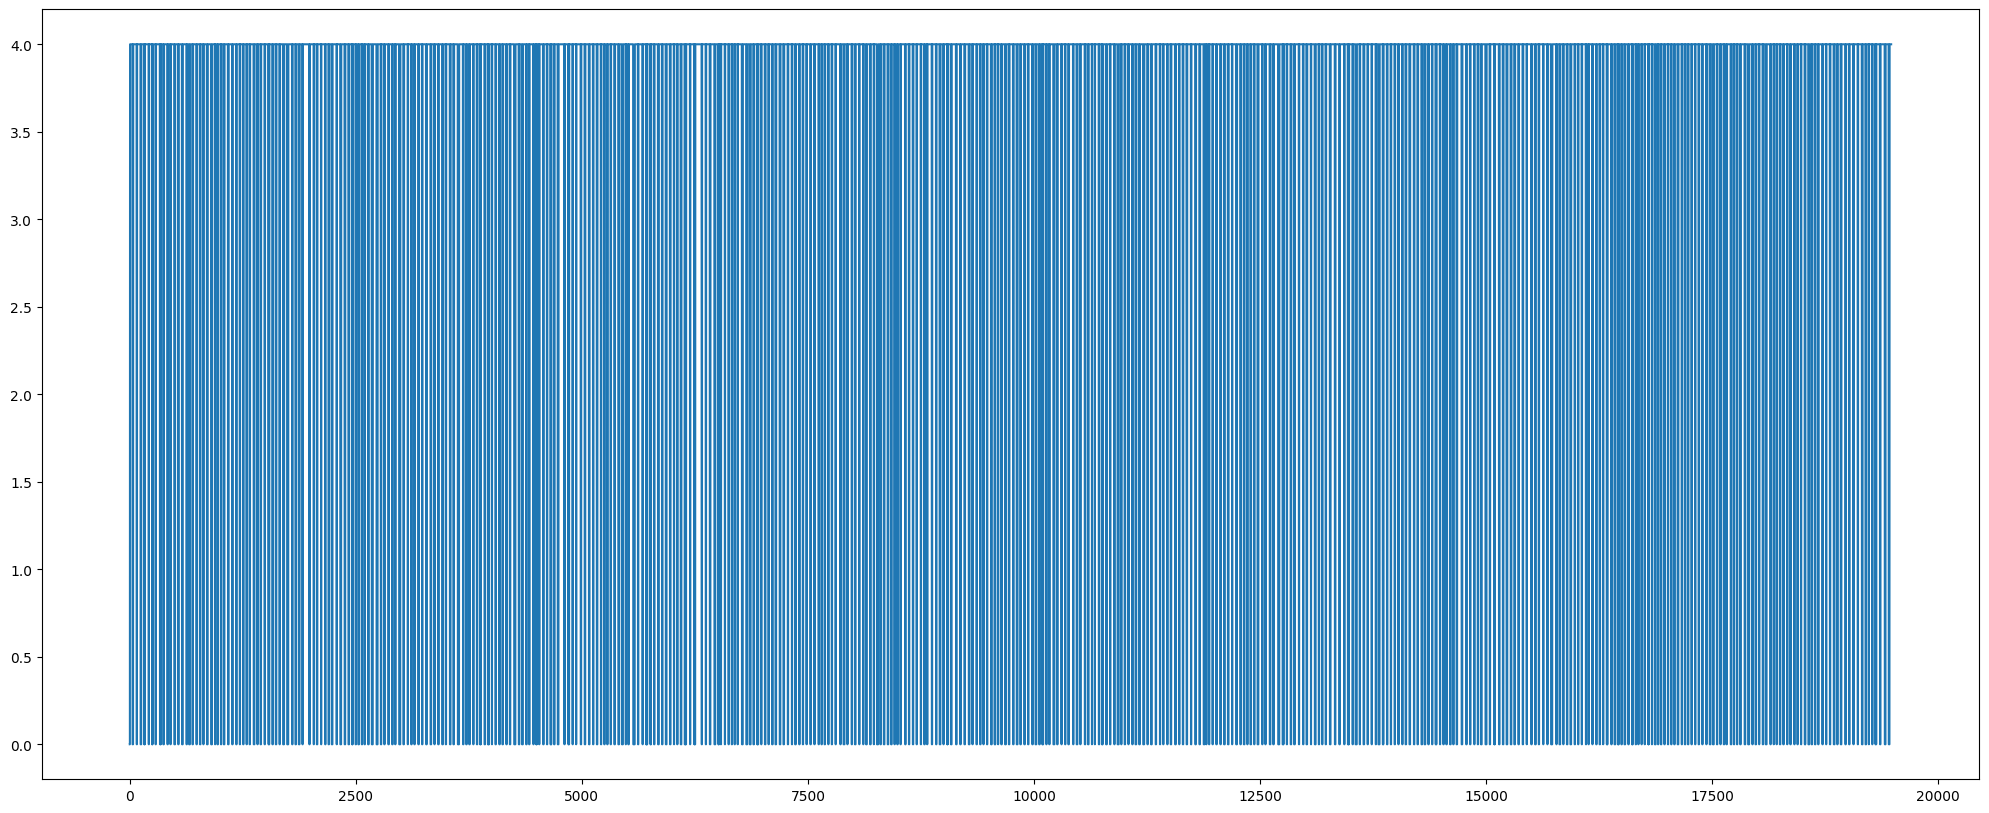

In [7]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_cap_aj-aung-k8s-worker2'])
plt.show()

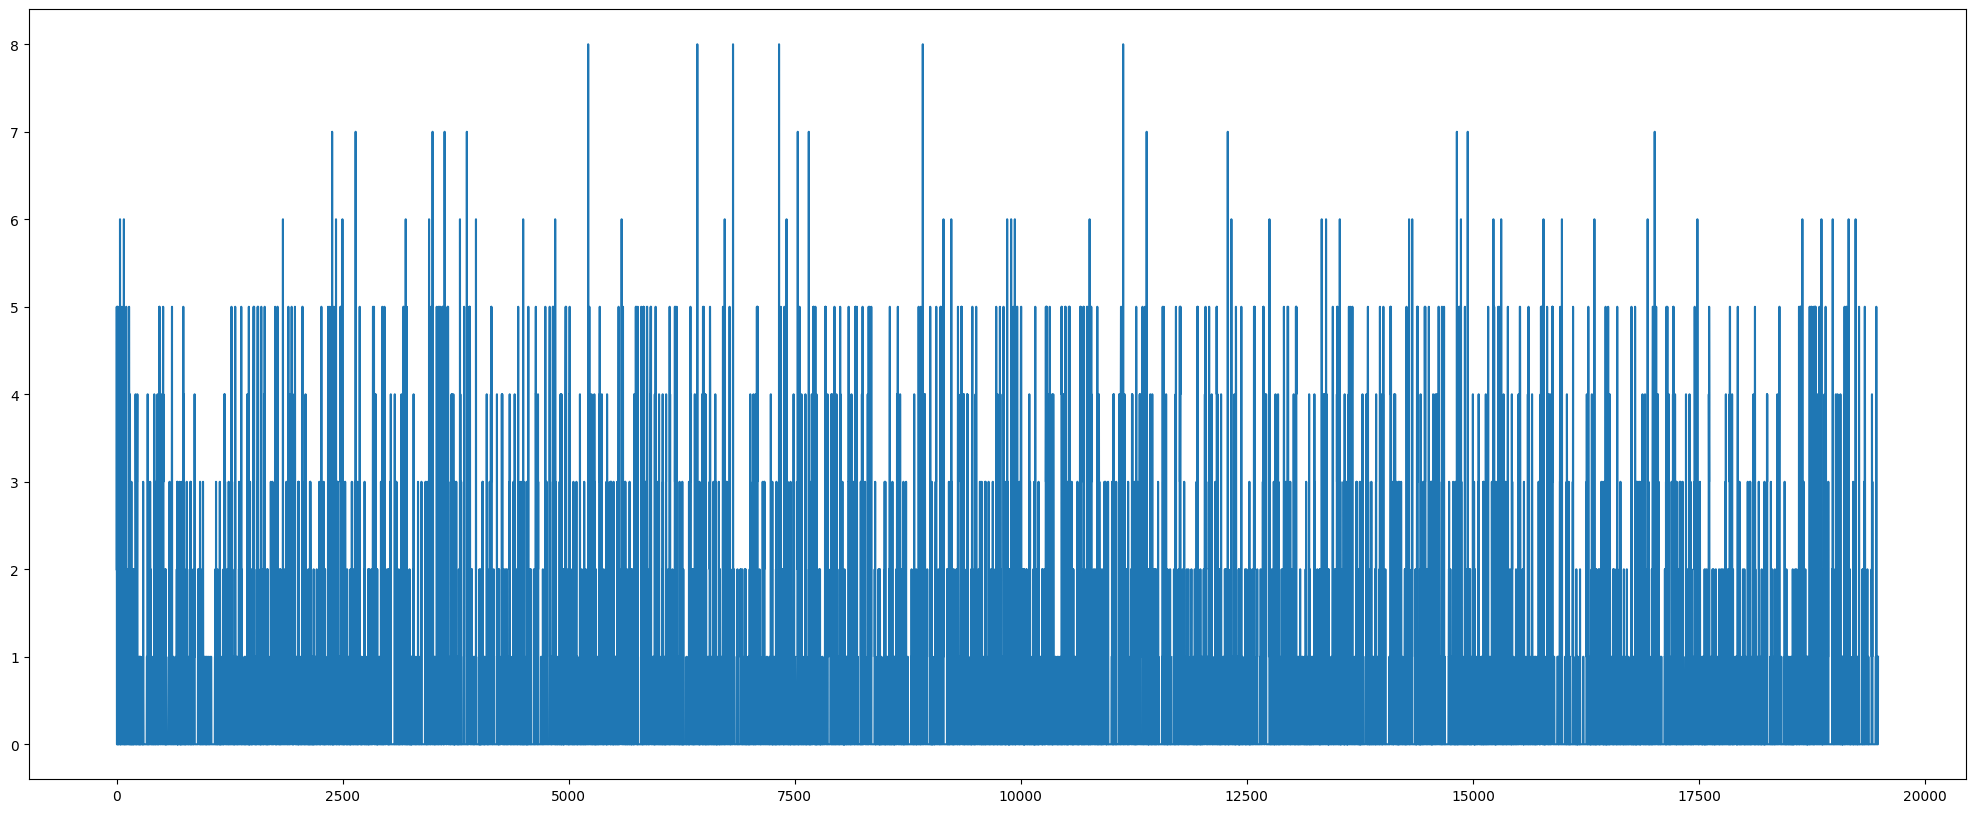

In [8]:
plt.figure(figsize = (25, 10))
plt.plot(df['cluster_pods_pending'])
plt.show()

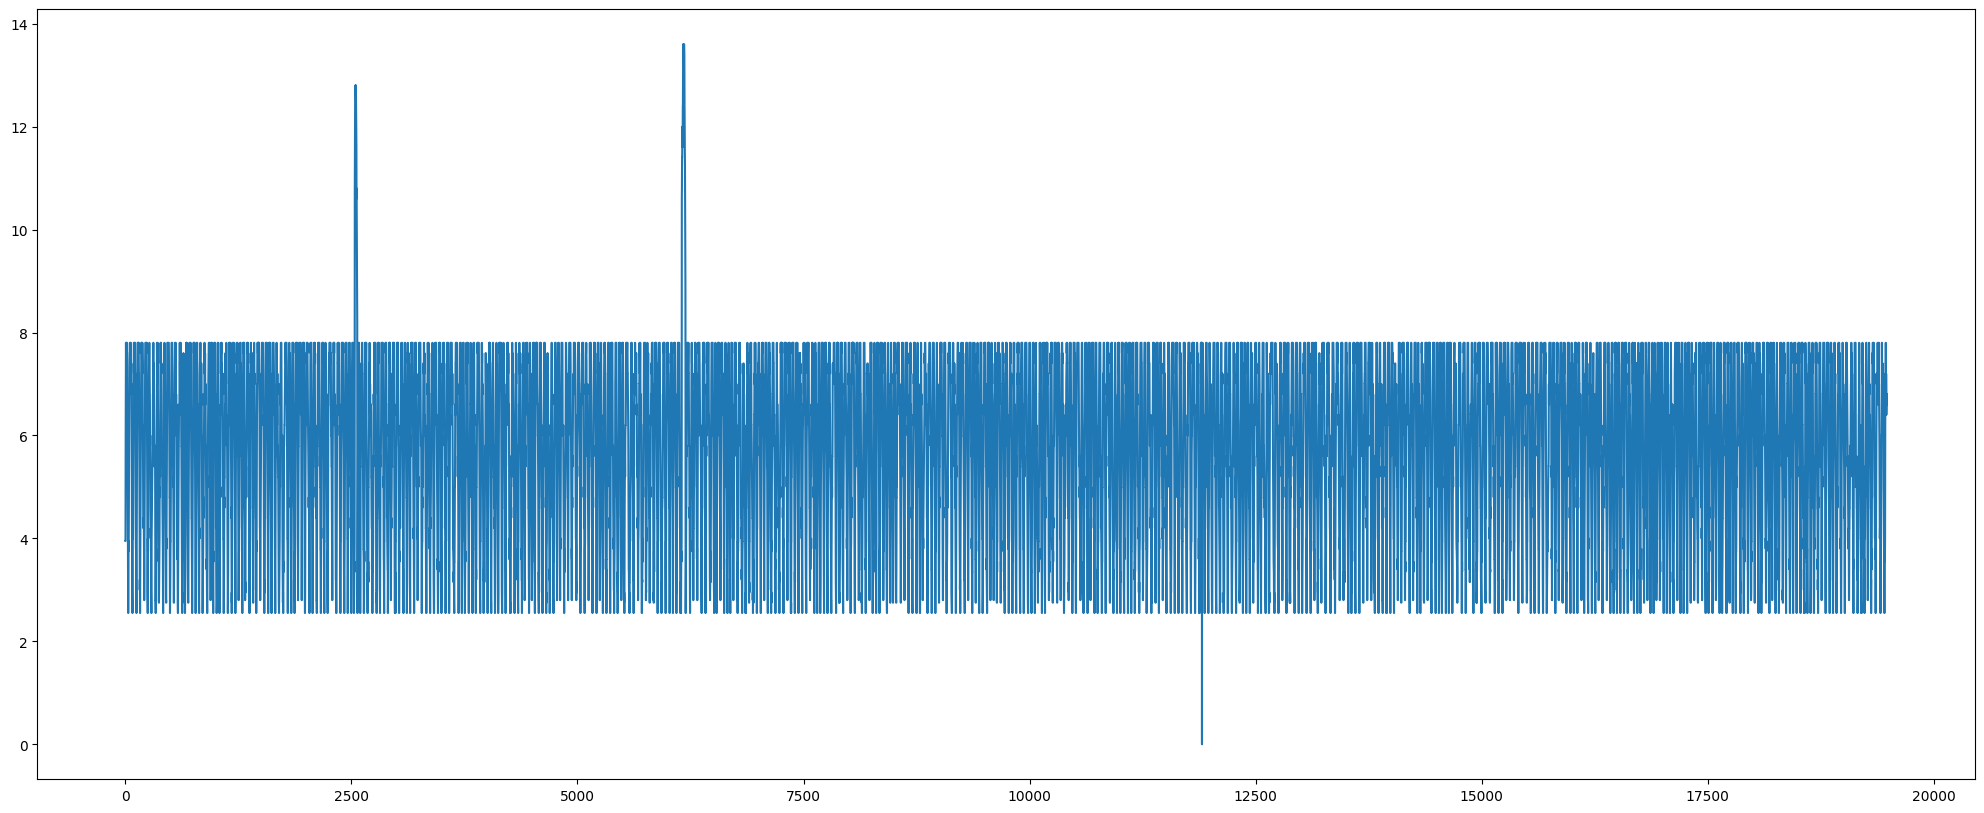

In [9]:
cluster_cpu_request = df['node_cpu_req_aj-aung-k8s-worker1'] + df['node_cpu_req_aj-aung-k8s-worker2']
plt.figure(figsize = (25, 10))
plt.plot(cluster_cpu_request)
plt.show()

In [10]:
def df_to_X_y(df, window_size = 5):
	df_as_np = df.to_numpy()
	X = []
	y = []
	for i in range(len(df_as_np) - window_size):
		row = [[a] for a in df_as_np[i:i + window_size]]
		X.append(row)
		label = df_as_np[i + window_size]
		y.append(label)
	return np.array(X), np.array(y)

In [11]:
X, y = df_to_X_y(cluster_cpu_request, 5)
X.shape, y.shape

((19477, 5, 1), (19477,))

In [12]:
X_train, y_train = X[:10000], y[:10000]
X_val, y_val = X[10000:12000], y[10000:12000]
X_test, y_test = X[12000:], y[12000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10000, 5, 1), (10000,), (2000, 5, 1), (2000,), (7477, 5, 1), (7477,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2026-02-13 23:55:47.459159: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-13 23:55:47.839697: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-13 23:55:50.166496: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [ ]:
cp = ModelCheckpoint('model1.h5', save_best_only = True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, callbacks = [cp])

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.h5')

In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals': y_train})
train_results

In [ ]:
plt.figure(figsize = (25, 10))
plt.plot(train_results['Train Predictions'][:10000])
plt.plot(train_results['Actuals'][:10000])